# 5.2 聚类算法初步

## 一、 向量间的距离/度量

给定两个长度为$p$的向量$\mathbf{x}_i = (x_{i1}, x_{i2}, \cdots,x_{ip})$和 $\mathbf{x}_j = (x_{j1}, x_{j2}, \cdots,x_{jp})$,两者之间的距离人们往往用欧氏距离来进行度量：
$$ d \left( {{x_i},{x_j}} \right) = \left[ \sum\limits_{k = 1}^p (x_{ik} - x_{jk})^2 \right]^{\frac{1}{2}} $$

**向量距离**的概念在**机器学习**中有重要应用：

### K-近邻(K-Nearest Neighbour, KNN)
即是给定一个训练数据集，对新的输入实例，在训练数据集中找到与该实例最邻近的K个实例，这K个实例的多数属于某个类，就把该输入实例分类到这个类中。这就类似于现实生活中少数服从多数的思想!

- **K=3（三局两胜，红），还是 K=5（五局三胜，蓝）?**

让我们先来看下引自维基百科上的一幅图: 
![avatar](figs/knnalg.png)

#### 样本数据分两类: 
##### * 蓝色的小正方形
##### * 红色的小三角形
#### 待分类数据
#####  绿色的圆 ? (少数服从多数)

 - **归一化的作用**

例：一个人身高(cm)与脚码（尺码）大小来作为特征值，类别为男性或者女性。我们现在如果有5个训练样本，分布如下：

  A [(179,42), 男]  
  
  B [(178,43), 男] 
  
  C [(165,36), 女] 
  
  D [(177,42), 男]  
  
  E [(160,35), 女]
  
  现在给定一个待测样本 **F(167,43)** ，问他是男性还是女性？ 

In [60]:
X = [179, 42; 178,43; 165,36; 177, 42; 160,35]
label = [1,1,0,1,0]'

X =

   179    42
   178    43
   165    36
   177    42
   160    35

label =

   1
   1
   0
   1
   0



注意到第一维身高特征是第二维脚码特征的4倍左右，那么在进行距离度量的时候，我们就会偏向于第一维特征。 这里，我们取$k=3$来预测：

![avatar](figs/knnalg2.png)

In [ ]:
Y = [167.0, 43.0];
dist = sqrt( ((X(:,1)-Y(1)).*(X(:,1)-Y(1))) +  ((X(:,2)-Y(2)).*(X(:,2)-Y(2))) );

 - 由计算可以得到，最近的前三个分别是C,D,E三个样本，那么由C,E为女性，D为男性，女性多于男性得到我们要预测的结果为女性!
 - **一个女性的脚43码的可能性，远远小于男性脚43码的可能性，那么为什么算法还是会预测F为女性呢？那是因为由于各个特征量纲的不同，在这里导致了身高的重要性已经远远大于脚码了，这是不客观的**

**改进：Each Feature Matters!**

### 假设样本特征为 $\{(x_{i1}, x_{x2}, ..., x_{im})\}_{i=1}^{m} $, 每个特征的最值为:
$$ M_{j} = \max_{i=1,2,...m} x_{ij}  - \min_{i=1,2,...,m} x_{ij}$$
则在计算时, 将每个特征除以对应的 $M_{j}$ , 来进行归一化, 即
$$ d(X, Y)  = \sqrt{\sum_{j=1}^{m}\bigg(\frac{X_j - Y_j}{M_j}\bigg)^2} $$

In [61]:
M1 = max(X(:,1)) - min(X(:,1))
M2 = max(X(:,2)) - min(X(:,2))

M1 =  19
M2 =  8


In [62]:
dist_norm = sqrt( ((X(:,1)-Y(1)).*(X(:,1)-Y(1)))/M1/M1 +  ((X(:,2)-Y(2)).*(X(:,2)-Y(2)))/M2/M2 );
[dist, dist_norm, label]

ans =

   12.04159    0.64383    1.00000
   11.00000    0.57895    1.00000
    7.28011    0.88131    0.00000
   10.04988    0.54096    1.00000
   10.63015    1.06571    0.00000



 - 由第1列结果取最小的K=3个选项，为3-5行，两个0一个1，故判断结果为0，即女性
 - 由第2列结果取最小的K=3个选项，为2-4行，两个1一个0，故判断结果为1，即男性

#### 其算法的描述为：

- 计算测试数据与各个训练数据之间的距离；

- 按照距离的递增关系进行排序；

- 选取距离最小的K个点；

- 确定前K个点所在类别的出现频率；

- 返回前K个点中出现频率最高的类别作为测试数据的预测分类。

事实上，向量间举例的常用度量还有其他很多形式，如：

（2）	绝对距离
$$ d\left( {{x_i},{x_j}} \right) = \sum\limits_{k = 1}^p {\left| {{x_{ik}} - {x_{jk}}} \right|} $$ 
（3）	闵氏距离
$$ d\left( {{x_i},{x_j}} \right) = \left[ \sum\limits_{k = 1}^p \left| x_{ik} - x_{jk} \right| ^m \right]^{\frac{1}{m}}$$
（4）	切氏距离
$$ d\left( {{x_i},{x_j}} \right) = \max \limits_{1 \le k \le p} \left| x_{ik} - x_{jk} \right| $$
（5）	方差加权距离
$$ d\left( {{x_i},{x_j}} \right) = \left[ \sum\limits_{k = 1}^p ({x_{ik}} - {x_{jk}})^2/s_k^2 \right]^{\frac{1}{2}},\qquad
 s_k^2 = \frac{1}{{n - 1}}{\sum\limits_{j = 1}^n {({x_{jk}} - \overline {{x_k}} )} ^2},\overline {{x_k}}  = \frac{1}{n}\sum\limits_{j = 1}^n {{x_{jk}}} $$
（6）	马氏距离
$$ d\left( {{x_i},{x_j}} \right) = {\left( {{x_i} - {x_j}} \right)^T}\Sigma^{ - 1} {\left( {{x_i} - {x_j}} \right)} $$

此外，还有“余弦相似度”等以角度计算的度量，在推荐算法中也被经常适用。 在Octave中，计算距离的命令是pdist，调用格式为：

 Y = pdist(X,distance)

可选的distance有：euclidean（欧氏距离）；cityblock（绝对距离）；minkowski（闵氏距离）；chebychev（切氏距离）；seuclidean（方差加权距离）；mahalanobis（马氏距离）等，在聚类分析中最常用的是欧氏距离。

In [3]:
pkg load statistics

In [4]:
pdist

error: Invalid call to pdist.  Correct usage is:

 -- Function File: Y = pdist (X)
 -- Function File: Y = pdist (X, METRIC)
 -- Function File: Y = pdist (X, METRIC, METRICARG, ...)

Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at http://www.octave.org and via the help@octave.org
mailing list.


例1：  2008年我国5省、区、市城镇居民人均年家庭收入见表，为了研究上述5省、区、市城镇居民收入差异，需要利用统计资料对其进行分类，指标变量有4个，计算各省、区、市之间的前6中距离。
\begin{array}{ccccc}
省（市、区） & 工薪收入 & 经营净收入 & 财产性收入 & 转移性收入\\ 
北京 	&18738.96，&	778.36&452.75&7707.87\\
上海	&21791.11	&1399.14	&369.12	&6199.77 \\
安徽	&9302.38	&959.43	&293.92&	3603.72 \\
陕西	&8354.63	&638.76	&65.33	&2610.61 \\
新疆	&9422.22	&938.15	&141.75&	1976.49 \\
\end{array}

In [6]:
x=[18738.96  778.36    452.75  7707.87; ...
   21791.11   1399.14   369.12   6199.77; ...
   9302.38   959.43   293.92   3603.72; ...
   8354.63   638.76  65.33  2610.61; ...
   9422.22    938.15   141.75   1976.49];

In [7]:
d1 = pdist(x)   % default option is 'Euclidean'

d1 =

 Columns 1 through 6:

   3.4616e+03   1.0293e+04   1.1575e+04   1.0944e+04   1.2763e+04   1.3932e+04

 Columns 7 through 10:

   1.3080e+04   1.4281e+03   1.6389e+03   1.2796e+03



In [10]:
d2 = pdist(x,'minkowski')   % try 'cityblock','minkowski', 'chebychev','seuclidean' and 'mahalanobis'

d2 =

 Columns 1 through 6:

   3.4616e+03   1.0293e+04   1.1575e+04   1.0944e+04   1.2763e+04   1.3932e+04

 Columns 7 through 10:

   1.3080e+04   1.4281e+03   1.6389e+03   1.2796e+03



## 二、聚类

### 2.1 谱系聚类
谱系聚类是根据生物分类学的思想对研究对象进行分类的方法。谱系聚类首先将每个样品看成一类，然后把最相似的的样品聚为小类，再将已聚合的小类按各类之间的相似性进行在聚合，随着相似性的减弱，最后将一切子类聚为一大类，从而得到一个按相似性大小聚结起来的谱系图。具体实施步骤如下：

（1） $n$ 个样品开始作为	$n$ 个类，计算两两之间的距离或相似系数，得到实对称矩阵 
$$ {D_0} = \left( {\begin{array}{*{20}{c}}
{{d_{11}}}& \ldots &{{d_{1n}}}\\
 \vdots & \ddots & \vdots \\
{{d_{n1}}}& \cdots &{{d_{nn}}}
\end{array}} \right) $$

（2）	从${D_0}$ 的非主对角线上找最小距离或最大相似系数，设该元素是${D_pq}$ ，则将${G_p},{G_q}$合并成一个新类${G_r} = \left( {{G_p},{G_q}} \right)$ ，在${D_0}$ 中去掉${G_p},{G_q}$ 所在的两行、两列，并加上新类${G_r}$ 与其各类之间的距离或相似系数，得到 $n-1$ 阶矩阵${D_1}$

（3）	从${D_1}$ 出发重复步骤2）的做法得到${D_2}$ ，再由${D_2}$ 出发重复上述步骤，直到全部样品聚为一个大类为止。

（4）在合并过程中要记下合并样品的编号及两类合并时的水平，并绘制谱系聚类图。在Octave中：

    谱系聚类命令为linkage,其调用格式为：  Z=linkage(Y,method)， 其中输入Y是一个距离矩阵，可由pdist()计算得到

    做谱系聚类图命令为dendrogram,其调用格式为：H=dendrogram(Z,N)

    输出聚类结果命令为cluster, 其调用格式为：T=cluster(Z,K)   %% 这个在Octave中尚未实现，参考help cluster

例2：利用谱系聚类对例1中的5个省、区、市进行聚类分析。  

解：

In [23]:
%%% 注意：矩阵输入也可以这样子！！
x=[18738.96  778.36    452.75  7707.87
   21791.11   1399.14   369.12   6199.77
   9302.38   959.43   293.92   3603.72
   8354.63   638.76  65.33  2610.61
   9422.22    938.15   141.75   1976.49];
d = pdist(x);

d =

 Columns 1 through 6:

   3.4616e+03   1.0293e+04   1.1575e+04   1.0944e+04   1.2763e+04   1.3932e+04

 Columns 7 through 10:

   1.3080e+04   1.4281e+03   1.6389e+03   1.2796e+03



In [19]:
z1 = linkage(d)    

z1 =

   4.0000e+00   5.0000e+00   1.2796e+03
   3.0000e+00   6.0000e+00   1.4281e+03
   1.0000e+00   2.0000e+00   3.4616e+03
   7.0000e+00   8.0000e+00   1.0293e+04



上述输出表明：在0.12796的水平下，第4和第5行可以合成第一类/行, ... 每一行都是如此。

H =

   2.0000e+00   0.0000e+00
   1.0000e+00   0.0000e+00
   5.0000e+00   0.0000e+00
   4.0000e+00   0.0000e+00
   3.0000e+00   0.0000e+00
   3.5000e+00   1.2796e+03
   4.2500e+00   1.4281e+03
   1.5000e+00   3.4616e+03
   2.8750e+00   1.0293e+04



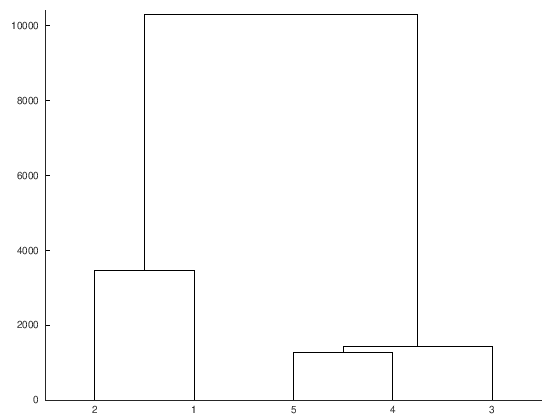

In [20]:
H = dendrogram(z1)

In [17]:
help cluster

error: help: the 'cluster' function belongs to the statistics package from Octave
Forge but has not yet been implemented.

Please read <http://www.octave.org/missing.html> to learn how you can
contribute missing functionality.


### 2.2 K均值聚类

K均值(K-means)聚类是最著名的划分聚类算法，给定一个数据点集合和需要的聚类数目K，K由用户指定，K均值算法根据某个距离函数反复把数据分入K个聚类中。 在运用K均值聚类法之前，要根据实际问题先确定分类数 ，在每一类中选择有代表性的样品，这样的样品称为聚点。

若将$n$个样品分为$k$ 类，则先选择所有样品中距离最远的两个样品${x_{i1}},{x_{i2}}$ 为聚点，使得
$$ d\left( {{x_{i1}},{x_{i2}}} \right) = {d_{i1i2}} = \max \left\{ {{d_{ij}}} \right\}$$
然后选择第3个聚点${x_{i3}}$ ，使得${x_{i3}}$ 与前两个聚点的距离最小者等于所有其余的与${x_{i1}},{x_{i2}}$ 的较小距离中最大的，即
$$ \min \left\{ {d\left( {{x_{i3}},{x_{ir}}} \right),r = 1,2} \right\} = \max \left\{ {\min \left\{ {d\left( {{x_j},{x_{ir}}} \right),r = 1,2} \right\},j \ne i1,i2} \right\}$$
最后按相同的原则选取${x_{ik}}$ ，重复前面的步骤，直至确定$k$ 个聚点${x_{i1}},{x_{i2}},...{x_{ik}}$ 。

K均值聚类的步骤（样品之间的距离采用欧氏距离）如下：

（1）设第 个初始聚点的集合是
$$ {L^{\left( 0 \right)}} = \left\{ {x_1^{\left( 0 \right)},x_2^{\left( 0 \right)},...,x_k^{\left( 0 \right)}} \right\}$$
记
$$ G_i^{\left( 0 \right)} = \left\{ {x:d\left( {x,x_i^{\left( 0 \right)}} \right) \le d\left( {x,x_j^{\left( 0 \right)}} \right),j = 1,2,...,k,j \ne i} \right\}\left( {i = 1,2,...,k} \right)$$ 
于是，将样品分成不相交的$k$ 类，得到一个初始分类
$$ {G^{\left( 0 \right)}} = \left\{ {G_1^{\left( 0 \right)},G_2^{\left( 0 \right)},...,G_k^{\left( 0 \right)}} \right\}$$

（2）从初始类${G^{\left( 0 \right)}}$ 开始计算新的聚点集合${L^{\left( 1 \right)}}$ ，计算
$$ x_i^{\left( 1 \right)} = \frac{1}{{{n_i}}}\sum\limits_{{x_l} \in G_i^{\left( 0 \right)}} {{x_l}} \left( {i = 1,2,...,k} \right)$$ 
其中$n_i$ 是类${G^{\left( 0 \right)}}$ 中的样品数，得到一个新的集合
$${L^{\left( 1 \right)}} = \left\{ {x_1^{\left( 1 \right)},x_2^{\left( 1 \right)},...,x_k^{\left( 1 \right)}} \right\}$$
从 ${L^{\left( 1 \right)}}$ 开始再进行分类，记
$$G_i^{\left( 1 \right)} = \left\{ {x:d\left( {x,x_i^{\left( 1 \right)}} \right) \le d\left( {x,x_j^{\left( 1 \right)}} \right),j = 1,2,...,k,j \ne i} \right\}\left( {i = 1,2,...,k} \right)$$ 
得到一个新的类
$${G^{\left( 1 \right)}} = \left\{ {G_1^{\left( 1 \right)},G_2^{\left( 1 \right)},...,G_k^{\left( 1 \right)}} \right\}$$

（3） 重复上述步骤$m$ 次得
$$ {G^{\left( m \right)}} = \left\{ {G_1^{\left( m \right)},G_2^{\left( m \right)},...,G_k^{\left( m \right)}} \right\} $$ 
其中$x_i^{\left( m \right)}$ 是类$G_i^{\left( {m - 1} \right)}$ 的重心。$x_i^{\left( m \right)}$ 不一定是样品。当 $m$ 逐渐增大时，分类趋于稳定。同时 $x_i^{\left( m \right)}$可以近似地看作是$G_i^{\left( {m } \right)}$ 的重心，即
$$ x_i^{\left( {m + 1} \right)} \approx x_i^{\left( m \right)},G_i^{\left( {m + 1} \right)} \approx G_i^{\left( m \right)}$$
此时结束计算。

（4）若对某一个$m$ ，
$${G^{\left( {m + 1} \right)}} = \left\{ {G_1^{\left( {m + 1} \right)},G_2^{\left( {m + 1} \right)},...,G_k^{\left( {m + 1} \right)}} \right\}$$
与
$${G^{\left( m \right)}} = \left\{ {G_1^{\left( m \right)},G_2^{\left( m \right)},...,G_k^{\left( m \right)}} \right\}$$
相同，则结束计算。

#### K均值聚类步骤概要

目标：给定一个数据集,根据某个\alert{距离函数}把数据分成K类。步骤：
 - 需事先确定分类数，并选择有代表性的**聚点**
 - 选择所有样品中距离最远的两个样品${x_{i1}},{x_{i2}}$ 为聚点，使得
   $$ d\left( {{x_{i1}},{x_{i2}}} \right) = {d_{i1i2}} = \max \left\{ {{d_{ij}}} \right\} $$
 - 选择第3个聚点${x_{i3}}$ ，使得${x_{i3}}$ 与前两个聚点的距离最小者等于所有其余的与${x_{i1}},{x_{i2}}$ 满足较小距离最大化:
    $$ \max \left\{ {\min \left\{ {d\left( {{x_j},{x_{ir}}} \right),r = 1,2} \right\},j \ne i1,i2} \right\} $$
 - 按相同的原则选取${x_{ik}}$ ，重复步骤直至确定$k$个聚点${x_{i1}},{x_{i2}},...{x_{ik}}$ 

Octave中实现K均值聚类的命令是kmeans，其调用格式为：

In [ ]:
help kmeans

例3：利用K均值聚类再根据例1中5个省、区、市的相关数据，对他们进行聚类分析。

In [29]:
x = [18738.96    778.36    452.75   7707.87
     21791.11   1399.14    369.12   6199.77   
      9302.38    959.43    293.92   3603.72   
      9794.82    544       151.46   3356.85   
      9422.22    938.15    141.75   1976.49];

In [30]:
 [a,b] = kmeans(x,3)

a =

   2
   3
   1
   1
   1

b =

   9.5065e+03   8.1386e+02   1.9571e+02   2.9790e+03
   1.8739e+04   7.7836e+02   4.5275e+02   7.7079e+03
   2.1791e+04   1.3991e+03   3.6912e+02   6.1998e+03



### 三、 案例研究：利用K-means实施图像分割

如下是一个针对图像数据I像素的K-means计算程序，请阅读：

In [1]:
function [F,C] = imkmeans(I,C)
if nargin~=2
    error('只能有两个输入参数');
end
if isempty(C)
    K=2;
    C=[];
elseif isscalar(C)
    K=C;
    C=[];
else
    K=size(C,1);
end
X = exactvecotr(I);
if isempty(C)
    C = searchintial(X,'sample',K);
end
Cprev=rand(size(C));
while true
    D = sampledist(X,C,'euclidean');
    [~,locs]=min(D,[],2);
    for i=1:K
        C(i,:)=mean(X(locs==i,:),1);
    end
    if norm(C(:)-Cprev(:))<eps
        break
    end
    Cprev=C;
end
[m,n,~]=size(I);
F=reshape(locs,[m,n]);
endfunction

In [2]:
function vec = exactvecotr(img)
[m,n,~] = size(img);
vec=zeros(m*n,3);
img=double(img);
for j=1:n
    for i=1:m
        color=img(i,j,:);
        wx=1;wy=1;
        dist=[wx*j/n,wy*i/m];
        dist=[];
        texture=[];
        vec((j-1)*m+i,:)=[color(:);dist(:);texture(:)];
    end
end
endfunction

In [3]:
function C = searchintial(X,method,varargin)
switch lower(method(1))
    case 's'
        K=varargin{1};
        C=X(randsample(size(X,1),K),:);
    case 'u'
        Xmins=min(X,[],1);
        Xmaxs=max(X,[],1);
        K=varargin{1};
        C=unifrnd(Xmins(ones(K,1),:),Xmaxs(ones(K,1),:));
end
endfunction

In [4]:
function D=sampledist(X,C,method,varargin)
[n,p]=size(X);
K=size(C,1);
D=zeros(n,K);
switch lower(method(1))
    case 'e'
        for i =1:K
            D(:,i)=(X(:,1)-C(i,1)).^2;
            for j=2:p
                D(:,i)=D(:,i)+(X(:,j)-C(i,j)).^2;
            end
        end
    case 'c'
        for i=1:K
            D(:,i)=abs(X(:,1)-C(i,1));
            for j=2:p
                D(:,i)=D(:,i)+abs(X(:,j)-C(i,j));
            end
        end
end
endfunction

主程序：

In [6]:
pkg load statistics

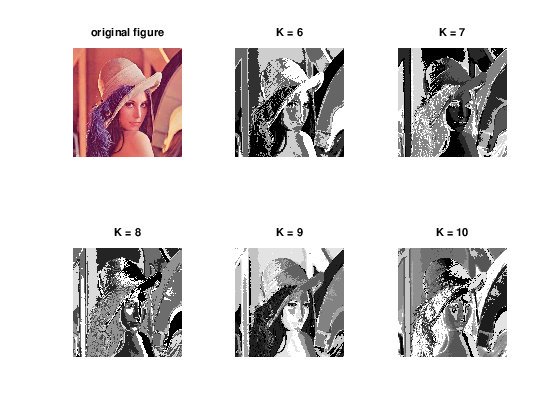

In [9]:
I=imread('figs/lena.jpg');
I=double(I)/255;
figure;subplot(2,3,1)
imshow(I)
title('original figure')
for i=6:10
    F = imkmeans(I,i);
    subplot(2,3,i-4);
    imshow(F,[]);
    title(['K = ',num2str(i)])
end
print -dpng lena-clustering.png 

**练习**：请用matlab或octave重新绘制不同K值结果图（Jupyter中并不是太清晰），并将算法学习笔记和程序以及结果记录在文档中。